In [27]:
#----------------------------------------
#
#    💥💻LOF
#  
#----------------------------------------

from sklearn.neighbors import LocalOutlierFactor
import pandas as pd

# Usaremos el set vectorizado (sin SMOTE)
X_for_lof = X_full  # TF-IDF

# Crear el modelo LOF
lof = LocalOutlierFactor(
    n_neighbors=20,    # Número de vecinos a considerar (puede probarse 10, 20, 30)
    contamination=0.05 # Estimación inicial: se espera que el 5% sean outliers
)

# Ajustar el modelo y predecir
y_lof_pred = lof.fit_predict(X_for_lof)

# Interpretación:
# -1 = outlier (anómalo)
#  1 = inlier (normal)

# Agregar la predicción al dataset
data_filtrado['LOF_Prediccion'] = y_lof_pred

# Mostrar conteo
print(data_filtrado['LOF_Prediccion'].value_counts())

# Opcional: ver algunos ejemplos de outliers detectados
outliers_detectados = data_filtrado[data_filtrado['LOF_Prediccion'] == -1]
print("\nAlgunos productos detectados como atípicos por LOF:")
print(outliers_detectados[['Nombre', 'Descripcion']].head(10))


LOF_Prediccion
 1    3612
-1     191
Name: count, dtype: int64

Algunos productos detectados como atípicos por LOF:
                                                Nombre  \
29                                        TONER AL 21%   
62   TALADRO MOD HP 2050                           ...   
71   PELA CABLE PROSKIT 8PK-CT001                  ...   
93   NOTEBOOK 02 HP MOD: TPN-I119                  ...   
116  COMPUTADORA INTEL I5 GABINTE SFX MEMORIA 8GB  ...   
229           PATCH PANEL CAT 6A - 24P (cargado)         
231  PATCH PANEL CAT 5E - 24P- RJ45 - "KLINE" "KOMP...   
232  PATCH PANEL CAT 6 - 24P - RJ45 - "KLINE" "KOMP...   
272  FUTP CAT 5E                                   ...   
273  FUTP CAT 5E FURUKAWA                          ...   

                                           Descripcion  
29                                        TONER AL 21%  
62                                                 NaN  
71                                                 NaN  
93               

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17268\379656913.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_lof.index, y=conteo_lof.values, palette="pastel")


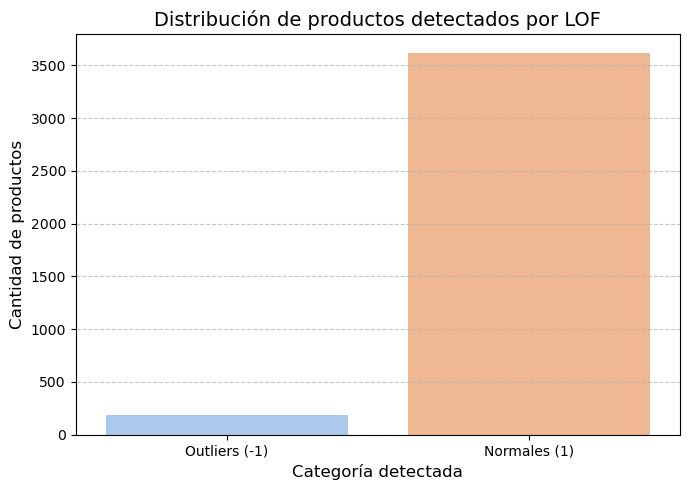

In [28]:
#----------------------------------------
#
#    💥💻LOF
#  
#----------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Suponemos que ya ejecutaste esto antes:
# data_filtrado['LOF_Prediccion']  # -1 = outlier, 1 = normal

# Contar la cantidad de normales y outliers
conteo_lof = data_filtrado['LOF_Prediccion'].value_counts().sort_index()
conteo_lof.index = ['Outliers (-1)', 'Normales (1)']  # Etiquetas más claras

# Crear gráfico de barras
plt.figure(figsize=(7, 5))
sns.barplot(x=conteo_lof.index, y=conteo_lof.values, palette="pastel")

# Títulos y etiquetas
plt.title("Distribución de productos detectados por LOF", fontsize=14)
plt.ylabel("Cantidad de productos", fontsize=12)
plt.xlabel("Categoría detectada", fontsize=12)

# Mejoras visuales
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [29]:
#----------------------------------------
#
#    💥💻DBSCAN
#  
#----------------------------------------
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

# Usamos el mismo conjunto que para LOF
X_for_dbscan = X_full  # TF-IDF

# Crear modelo DBSCAN
dbscan = DBSCAN(
    eps=1.5,          # Distancia máxima entre dos puntos para ser vecinos (ajustable)
    min_samples=5,    # Mínimo número de puntos en un vecindario para formar un cluster
    metric='cosine'   # Métrica para TF-IDF (coseno funciona mejor que euclidiana)
)

# Ajustar y predecir
dbscan_labels = dbscan.fit_predict(X_for_dbscan)

# Interpretación:
# -1 = ruido (outlier)
# 0, 1, 2, ... = clusters encontrados

# Agregar la predicción al DataFrame
data_filtrado['DBSCAN_Cluster'] = dbscan_labels

# Mostrar conteo de outliers y clusters
print(data_filtrado['DBSCAN_Cluster'].value_counts().sort_index())

# Opcional: ver algunos ejemplos detectados como ruido
outliers_dbscan = data_filtrado[data_filtrado['DBSCAN_Cluster'] == -1]
print("\nAlgunos productos detectados como ruido por DBSCAN:")
print(outliers_dbscan[['Nombre', 'Descripcion']].head(10))


DBSCAN_Cluster
0    3803
Name: count, dtype: int64

Algunos productos detectados como ruido por DBSCAN:
Empty DataFrame
Columns: [Nombre, Descripcion]
Index: []


Cantidad de clusters encontrados: 1
Cantidad de productos detectados como ruido (outliers): 0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17268\2299874641.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DBSCAN_Cluster', data=data_filtrado, palette='Set2')


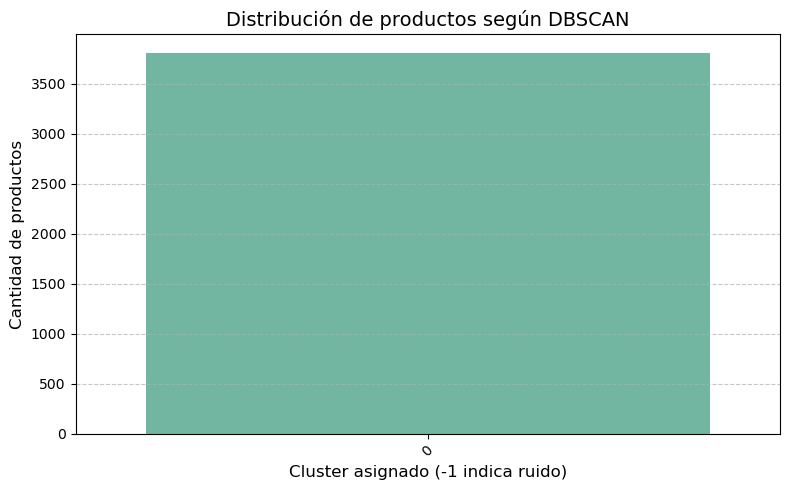


Algunos productos detectados como ruido por DBSCAN:
Empty DataFrame
Columns: [Nombre, Descripcion]
Index: []


In [30]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aplicar DBSCAN
X_for_dbscan = X_full  # TF-IDF sin PCA

dbscan = DBSCAN(
    eps=1.5,           # Distancia máxima entre vecinos
    min_samples=5,     # Mínimo número de vecinos
    metric='cosine'    # Métrica adecuada para vectores TF-IDF
)

dbscan_labels = dbscan.fit_predict(X_for_dbscan)

# Agregar los resultados al dataset
data_filtrado['DBSCAN_Cluster'] = dbscan_labels

# 2. Conteo de resultados
conteo_dbscan = data_filtrado['DBSCAN_Cluster'].value_counts().sort_index()

# Separar cantidad de ruido y clusters
n_ruido = (conteo_dbscan.index == -1).sum()
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print(f"Cantidad de clusters encontrados: {n_clusters}")
print(f"Cantidad de productos detectados como ruido (outliers): {(dbscan_labels == -1).sum()}")

# 3. Gráfico de barras de Clusters y Ruido
plt.figure(figsize=(8, 5))
sns.countplot(x='DBSCAN_Cluster', data=data_filtrado, palette='Set2')
plt.title('Distribución de productos según DBSCAN', fontsize=14)
plt.xlabel('Cluster asignado (-1 indica ruido)', fontsize=12)
plt.ylabel('Cantidad de productos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Opcional: ver ejemplos de productos detectados como ruido
outliers_dbscan = data_filtrado[data_filtrado['DBSCAN_Cluster'] == -1]
print("\nAlgunos productos detectados como ruido por DBSCAN:")
print(outliers_dbscan[['Nombre', 'Descripcion']].head(10))


Cantidad de clusters encontrados: 49
Cantidad de productos detectados como ruido (outliers): 1302


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17268\741985207.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DBSCAN_Cluster', data=data_filtrado, palette='Set2')


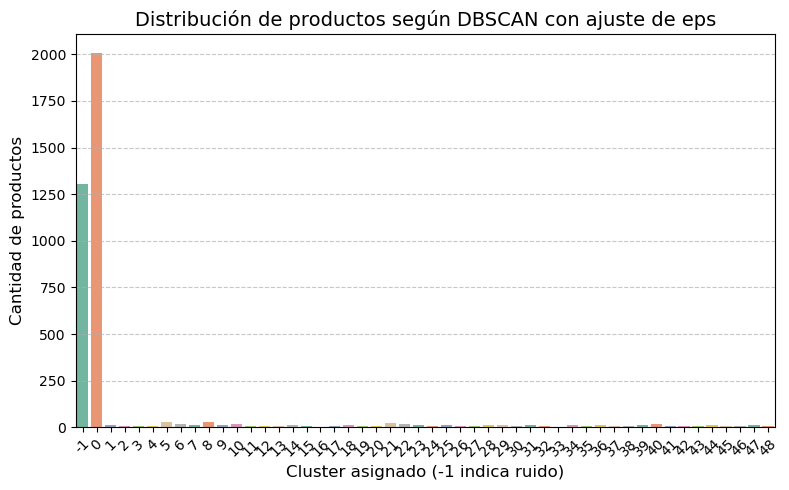


Algunos productos detectados como ruido por DBSCAN:
                                               Nombre  \
3                          COMBUSTIBLES Y LUBRICANTES   
7                                              RESMAS   
8                                           PAPELERÍA   
18                                              TOKEN   
26                     ELECTRODOMÉSTICOS P/LA EMPRESA   
28                                          CAFETERAS   
31                                      TELEVISOR LED   
37                                          REPUESTOS   
43                                       BATERÍAS UPS   
45  MATA CUCARACHAS                               ...   

                               Descripcion  
3             COMBUSTIBLES Y LUBRINCANTES.  
7                             RESMAS AUTOR  
8                          PAPELES- HOJAS.  
18                          TOKEN E CRYPTO  
26  ELECTRODOMÉSTICOS P/ USO DE LA EMPRESA  
28          CAFETERAS P/ USO DE LA EMPRESA  
31  

In [34]:
#Debemos bajar el valor de eps para que DBSCAN sea más estricto.
# eps=0.3,       # Mucho más estricto
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aplicar DBSCAN
X_for_dbscan = X_full  # TF-IDF sin PCA

dbscan = DBSCAN(
    eps=0.6,       # Mucho más estricto
    min_samples=5,     # Mínimo número de vecinos
    metric='cosine'    # Métrica adecuada para vectores TF-IDF
)

dbscan_labels = dbscan.fit_predict(X_for_dbscan)

# Agregar los resultados al dataset
data_filtrado['DBSCAN_Cluster'] = dbscan_labels

# 2. Conteo de resultados
conteo_dbscan = data_filtrado['DBSCAN_Cluster'].value_counts().sort_index()

# Separar cantidad de ruido y clusters
n_ruido = (conteo_dbscan.index == -1).sum()
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print(f"Cantidad de clusters encontrados: {n_clusters}")
print(f"Cantidad de productos detectados como ruido (outliers): {(dbscan_labels == -1).sum()}")

# 3. Gráfico de barras de Clusters y Ruido
plt.figure(figsize=(8, 5))
sns.countplot(x='DBSCAN_Cluster', data=data_filtrado, palette='Set2')
plt.title('Distribución de productos según DBSCAN con ajuste de eps', fontsize=14)
plt.xlabel('Cluster asignado (-1 indica ruido)', fontsize=12)
plt.ylabel('Cantidad de productos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Opcional: ver ejemplos de productos detectados como ruido
outliers_dbscan = data_filtrado[data_filtrado['DBSCAN_Cluster'] == -1]
print("\nAlgunos productos detectados como ruido por DBSCAN:")
print(outliers_dbscan[['Nombre', 'Descripcion']].head(10))


In [35]:
# Filtrar productos detectados como outliers en LOF y DBSCAN
outliers_ambos = data_filtrado[
    (data_filtrado['LOF_Prediccion'] == -1) & (data_filtrado['DBSCAN_Cluster'] == -1)
]

# Mostrar algunos ejemplos
print("Productos detectados como atípicos por ambos algoritmos:")
print(outliers_ambos[['Nombre', 'Descripcion']].head(10))

# Mostrar cantidad
print(f"\nCantidad de productos detectados como outliers por LOF y DBSCAN simultáneamente: {outliers_ambos.shape[0]}")


Productos detectados como atípicos por ambos algoritmos:
                                                 Nombre Descripcion
71    PELA CABLE PROSKIT 8PK-CT001                  ...         NaN
331   BOBINA UTP CAT 6 (EN MT SUELTO)               ...   CABLE UTP
676                        PELA CABLE PROSKIT 8PK-CT001  PELA CABLE
731   TENAZA CARPINTERO CARPINTERO N8               ...      TENAZA
770   JABALINA AC-COBR 1.5MTS- 3/8" C-TOMAC C-SELLO-...    JABALINA
970   EXTENSION M22 320 MM                          ...         NaN
1109  CART. HP CO. N°93                             ...    C9361TRI
1110  CART. HP NE. N°92                             ...     C9362WL
1139  CARTUCHO HP 662 XL NEGRO                      ...         NaN
1140  CARTUCHO HP 662 XL COLOR                      ...         NaN

Cantidad de productos detectados como outliers por LOF y DBSCAN simultáneamente: 71


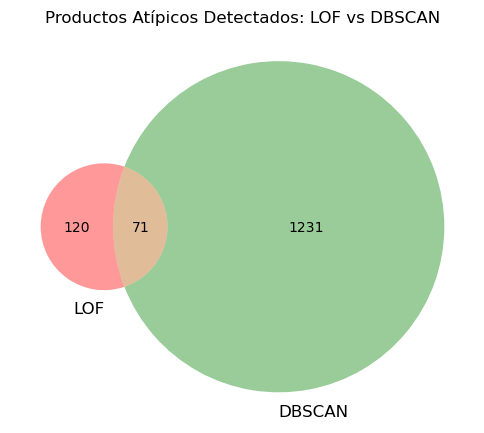

In [37]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

#  ya existan del  análisis previo
# data_filtrado['LOF_Prediccion']  # de LOF
# data_filtrado['DBSCAN_Cluster']  # de DBSCAN

# Crear conjuntos de índices
outliers_lof = set(data_filtrado[data_filtrado['LOF_Prediccion'] == -1].index)
outliers_dbscan = set(data_filtrado[data_filtrado['DBSCAN_Cluster'] == -1].index)

# Calcular cantidades
solo_lof = len(outliers_lof - outliers_dbscan)
solo_dbscan = len(outliers_dbscan - outliers_lof)
ambos = len(outliers_lof & outliers_dbscan)

# Dibujar gráfico de Venn
plt.figure(figsize=(6, 6))
venn2(subsets=(solo_lof, solo_dbscan, ambos), set_labels=('LOF', 'DBSCAN'))
plt.title('Productos Atípicos Detectados: LOF vs DBSCAN')
plt.show()


In [ ]:
## Segundas pruebas :probamos los modelos agregando ahora Descripción y y n-gramas.. Antes teníamos Nombre y n-gramas.